## This script contains the following:

* 1 - Import Data & Libraries
* 2 - Data Consistency Checks   
* 3 - Hypotheses:
     * 1) Hypothesis 1: Countries with a high GDP per capita level present a higher happiness score
         * I) Data Preparation for Regression Analysis
         * II) Regression Analysis       
     * 2) Hypothesis 2: Countries with a high life expectancy present the highest happiness score
         * I) Data Preparation for Regression Analysis
         * II) Regression Analysis
* 4 - Final Conclusions

### 1. Importing libraries and data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# This command propts matplotlib visuals to appear in the notebook 
%matplotlib inline

In [3]:
# Creating a path for the dataset
path = r'C:\Users\mavid\OneDrive - Universidad Nacional de Colombia\Weiterbildung\Exercises\Data_Inmersion\Achievement6\World Happiness'

In [4]:
# Import the world happiness data
df = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data','World_Happiness_2015-2022.csv'))

In [5]:
df.head()

,Country,Region,Year,Happiness_Rank,Happiness_Score,GDP_per_Capita,Social_support,Life_Expectancy,Freedom,Generosity,Corruption
0,Switzerland,Europa,2015,1,7.587,1.39651,1.34951,0.94143,0.66557,0.29678,0.41978
1,Iceland,Europa,2015,2,7.561,1.30232,1.40223,0.94784,0.62877,0.43630,0.14145
2,Denmark,Europa,2015,3,7.527,1.32548,1.36058,0.87464,0.64938,0.34139,0.48357
3,Norway,Europa,2015,4,7.522,1.45900,1.33095,0.88521,0.66973,0.34699,0.36503
4,Canada,North_America,2015,5,7.427,1.32629,1.32261,0.90563,0.63297,0.45811,0.32957


In [6]:
df.shape

(1230, 11)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1230 entries, 0 to 1229
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country          1230 non-null   object 
 1   Region           1230 non-null   object 
 2   Year             1230 non-null   int64  
 3   Happiness_Rank   1230 non-null   int64  
 4   Happiness_Score  1230 non-null   float64
 5   GDP_per_Capita   1230 non-null   float64
 6   Social_support   1230 non-null   float64
 7   Life_Expectancy  1230 non-null   float64
 8   Freedom          1230 non-null   float64
 9   Generosity       1230 non-null   float64
 10  Corruption       1229 non-null   float64
dtypes: float64(7), int64(2), object(2)
memory usage: 105.8+ KB


### 2. Data Consistency Checks

#### Missing Values

In [8]:
# Check for missing values
df.isnull().sum()

Country            0
Region             0
Year               0
Happiness_Rank     0
Happiness_Score    0
GDP_per_Capita     0
Social_support     0
Life_Expectancy    0
Freedom            0
Generosity         0
Corruption         1
dtype: int64

In [9]:
# Replacing missing values with NaN
df.fillna('NaN', inplace=True)

#### Duplicates

In [10]:
# Check for duplicates
dups = df.duplicated()
dups.shape # no dups

(1230,)

#### Checking if there is Mixed-data 

In [11]:
# check for mixed types (using test code)
for col in df.columns.tolist():
  weird = (df[[col]].applymap(type) != df[[col]].iloc[0].apply(type)).any(axis = 1)
  if len (df[weird]) > 0:
    print (col)

Corruption


In [12]:
#Changing a variable's data type 'Corruption'
df['Corruption'] = df['Corruption'].astype('float')
df['Corruption'].dtype

dtype('float64')

#### Checking extreme values 

<AxesSubplot:xlabel='Life_Expectancy', ylabel='Count'>

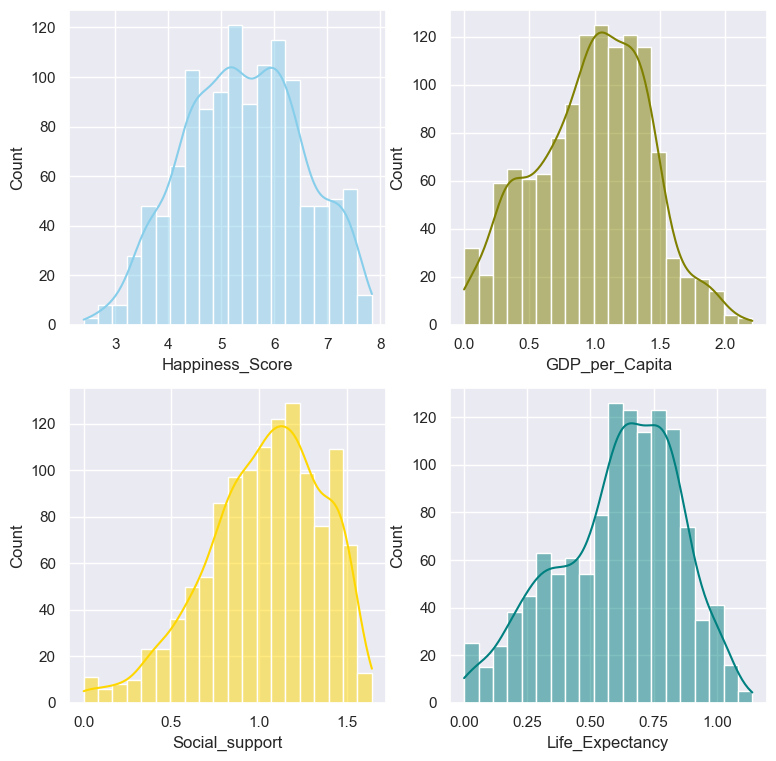

In [49]:
# Extreme values checks
# set a grey background (use sns.set_theme() 
sns.set(style="darkgrid")

fig, axs = plt.subplots(2, 2, figsize=(9, 9))

sns.histplot(df['Happiness_Score'], bins=20, kde = True, color="skyblue", ax=axs[0, 0])
sns.histplot(df['GDP_per_Capita'], bins=20, kde = True, color="olive", ax=axs[0, 1])
sns.histplot(df['Social_support'], bins=20, kde = True, color="gold", ax=axs[1, 0])
sns.histplot(df['Life_Expectancy'], bins=20, kde = True, color="teal", ax=axs[1, 1])

# There are not extreme values

### 3. Hypothesis

1. Countries with a high GDP per capita level present a higher happiness score
2. Countries with a high life expectancy present the highest happiness score

### Hypothesis 1: Countries with a high GDP per capita level present a higher happiness score

#### I) Data Preparation for Regression Analysis

##### GDP vs. Happiness score

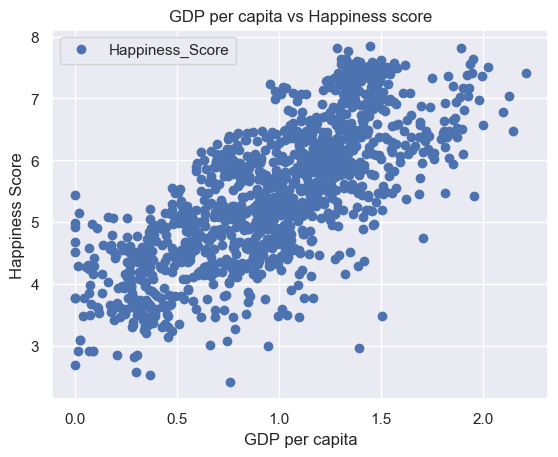

In [14]:
# Scatterplot to investigate how GDP and happiness score variables plot against each other.
df.plot(x = 'GDP_per_Capita', y='Happiness_Score',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('GDP per capita vs Happiness score')  
plt.xlabel('GDP per capita')  
plt.ylabel('Happiness Score')  
plt.show()

In [15]:
# Reshape the variables into NumPy arrays and put them into separate objects.
X = df['GDP_per_Capita'].values.reshape(-1,1)
y = df['Happiness_Score'].values.reshape(-1,1)

In [16]:
X

array([[1.39651],
       [1.30232],
       [1.32548],
       ...,
       [0.947  ],
       [1.392  ],
       [0.758  ]])

In [17]:
y

array([[7.587],
       [7.561],
       [7.527],
       ...,
       [2.995],
       [2.955],
       [2.404]])

In [18]:
# Split data into a training set and a test set.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

#### II) Regression Analysis

In [19]:
# Create a regression object.
regression = LinearRegression()  # Regression object, which will be fit onto the training set.

In [20]:
# Fit the regression object onto the training set.
regression.fit(X_train, y_train)

LinearRegression()

In [21]:
# Predict the values of y using X.
y_predicted = regression.predict(X_test)

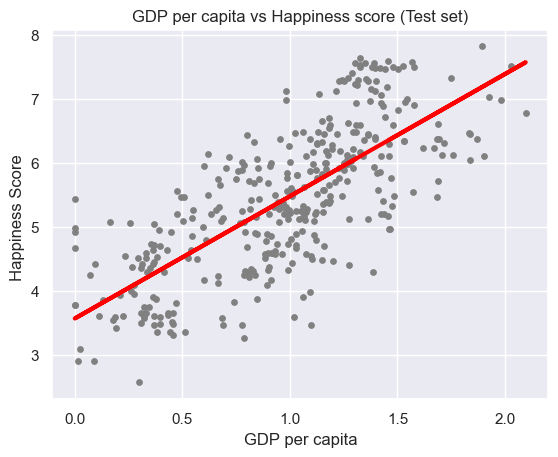

In [22]:
plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('GDP per capita vs Happiness score (Test set)')
plot_test.xlabel('GDP per capita')
plot_test.ylabel('Happiness Score ')
plot_test.show()

In [23]:
# Create objects that contain the model summary statistics.
rmse = mean_squared_error(y_test, y_predicted) #  mean squared error
r2 = r2_score(y_test, y_predicted) # R2 score. 

In [24]:
# Print the model summary statistics. This is where you evaluate the performance of the model.
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[1.91168828]]
Mean squared error:  0.5968761144532816
R2 score:  0.5339226360313873


In [25]:
y_predicted

array([[6.06605688],
       [5.89350731],
       [4.54304517],
       [5.76053086],
       [5.72243113],
       [5.19731614],
       [6.79475422],
       [5.01850905],
       [5.32275424],
       [5.09526334],
       [6.03246852],
       [5.98037501],
       [4.17755737],
       [4.71056204],
       [5.75905886],
       [5.98037501],
       [4.61925295],
       [6.10262466],
       [7.2057672 ],
       [5.07996983],
       [4.06103997],
       [6.19639579],
       [5.30513707],
       [5.40961051],
       [4.53705036],
       [7.24400097],
       [5.08039279],
       [6.10177029],
       [5.53495164],
       [5.45848411],
       [5.45083736],
       [5.82743995],
       [6.24801137],
       [5.38966333],
       [5.05522952],
       [4.70569964],
       [5.44892567],
       [5.51364492],
       [5.49149095],
       [5.77200099],
       [5.98419839],
       [5.28258384],
       [6.01235756],
       [6.22124773],
       [5.99517148],
       [3.56591271],
       [5.14791074],
       [5.362

In [26]:
# Create a dataframe comparing the actual and predicted values of y.
data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,6.9370,6.066057
1,6.4540,5.893507
2,3.3490,4.543045
3,4.4830,5.760531
4,5.5150,5.722431
5,5.9252,5.197316
6,5.7110,6.794754
7,5.8780,5.018509
8,4.5960,5.322754
9,6.4360,5.095263


#### III) Interpretation

The line fits the data. We observe a clear linear relationship where the data points are distributed around the trend line. On the other hand, an R-Squared value of 0.53 is quite good for this relationship, indicating that the model's independent variable explains 53% of the dependent variable variance. This means that the GDP per capita influence significantly the happiness score. However, the R-squared could be higher by including more independable variables, like social support and life expectancy, into the model. In addition, the mean squared error is low, corresponding to a good fit of the model. 

#### IV) Compare how the regression fits the training set

In [27]:
# Predict.
y_predicted_train = regression.predict(X_train) # This is predicting X_train!

In [28]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [29]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[1.91168828]]
Mean squared error:  0.5409316052045965
R2 score:  0.5590838664942787


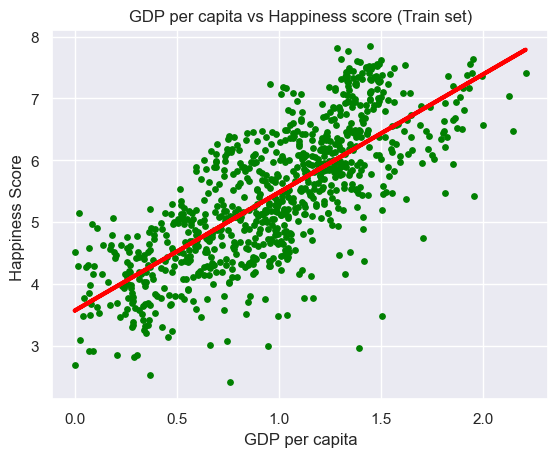

In [30]:
# Visualizing the training set results.
plot_test = plt
plot_test.scatter(X_train, y_train, color='green', s = 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('GDP per capita vs Happiness score (Train set)')
plot_test.xlabel('GDP per capita')
plot_test.ylabel('Happiness Score ')
plot_test.show()

##### Compare the predicted y values with the actual y values in a data frame.

The models' outcome on the training set is similar to the test set's. There is a slight increase in the R-squared and a decrease in the mean squared error. However, the difference is small.

### Hypothesis 2: Countries with a high life expectancy present the highest happiness score

#### I) Data Preparation for Regression Analysis

##### Life expectancy vs. Happiness score

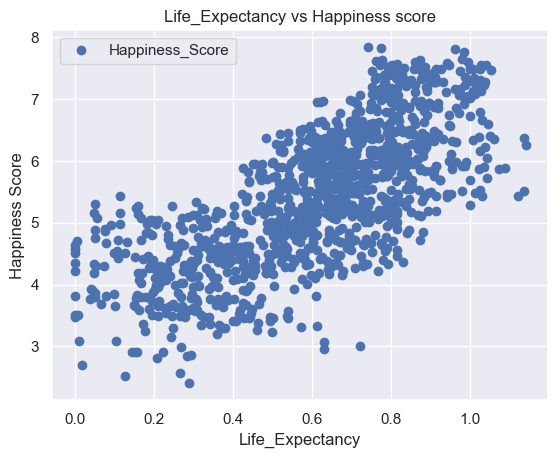

In [31]:
# Scatterplot to investigate how life expectancy and happiness score variables plot against each other.
df.plot(x = 'Life_Expectancy', y='Happiness_Score',style='o')  
plt.title('Life_Expectancy vs Happiness score')  
plt.xlabel('Life_Expectancy')  
plt.ylabel('Happiness Score')  
plt.show()

In [32]:
# Reshape the variables into NumPy arrays and put them into separate objects.
X = df['Life_Expectancy'].values.reshape(-1,1)
y = df['Happiness_Score'].values.reshape(-1,1)

In [33]:
X

array([[0.94143],
       [0.94784],
       [0.87464],
       ...,
       [0.27   ],
       [0.631  ],
       [0.289  ]])

In [34]:
y

array([[7.587],
       [7.561],
       [7.527],
       ...,
       [2.995],
       [2.955],
       [2.404]])

In [35]:
# Split data into a training set and a test set.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

#### II) Regression Analysis

In [36]:
# Create a regression object.
regression = LinearRegression()  # Regression object, which will be fit onto the training set.

In [37]:
# Fit the regression object onto the training set.
regression.fit(X_train, y_train)

LinearRegression()

In [38]:
# Predict the values of y using X.
y_predicted = regression.predict(X_test)

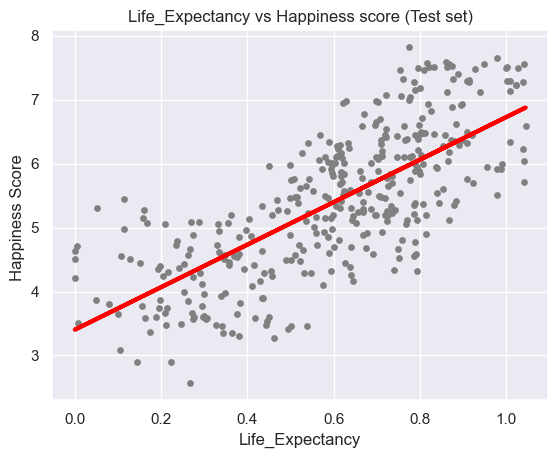

In [39]:
plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Life_Expectancy vs Happiness score (Test set)')
plot_test.xlabel('Life_Expectancy')
plot_test.ylabel('Happiness Score ')
plot_test.show()

In [40]:
# Create objects that contain the model summary statistics.
rmse = mean_squared_error(y_test, y_predicted) #  mean squared error
r2 = r2_score(y_test, y_predicted) # R2 score. 

In [41]:
# Print the model summary statistics. This is where you evaluate the performance of the model.
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[3.32462641]]
Mean squared error:  0.5732271854625917
R2 score:  0.5523891657144484


In [42]:
y_predicted

array([[6.38418151],
       [5.79421599],
       [4.61494594],
       [5.13521911],
       [6.6593334 ],
       [6.19191086],
       [5.46435712],
       [5.60060031],
       [5.36461833],
       [5.88326005],
       [6.35904733],
       [6.86734947],
       [4.11113444],
       [6.03615956],
       [5.83432155],
       [6.86734947],
       [5.80679364],
       [6.65900366],
       [5.88658468],
       [5.25823028],
       [4.24421923],
       [6.02289436],
       [5.38462777],
       [4.52884652],
       [5.0587527 ],
       [5.98299884],
       [4.91721543],
       [6.73051917],
       [5.26820416],
       [5.37459221],
       [5.474331  ],
       [6.08938689],
       [6.0661145 ],
       [4.84265198],
       [6.02433754],
       [5.24312915],
       [5.20503626],
       [5.90516458],
       [5.44178972],
       [6.32543536],
       [5.42113698],
       [6.03631492],
       [5.74252861],
       [6.18912568],
       [6.69815923],
       [3.78542079],
       [4.11983109],
       [4.500

In [43]:
# Create a dataframe comparing the actual and predicted values of y.
data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,6.9370,6.384182
1,6.4540,5.794216
2,3.3490,4.614946
3,4.4830,5.135219
4,5.5150,6.659333
5,5.9252,6.191911
6,5.7110,5.464357
7,5.8780,5.600600
8,4.5960,5.364618
9,6.4360,5.883260


#### III) Interpretation

Here again, we observe a clear linear relationship between Life expectancy and happiness score. The R-Squared value is slightly higher than GDP (0.55), indicating that the model's independent variable explains 55% of the dependent variable variance. In addition, the mean squared error is low. Therefore, Life expectancy influences the happiness score significantly. As mentioned before, a higher fitting model could be created by using multiple linear regression.

#### IV) Compare how the regression fits the training set

In [44]:
# Predict.
y_predicted_train = regression.predict(X_train) # This is predicting X_train!

In [45]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [46]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[3.32462641]]
Mean squared error:  0.5898892483602876
R2 score:  0.5191782397605706


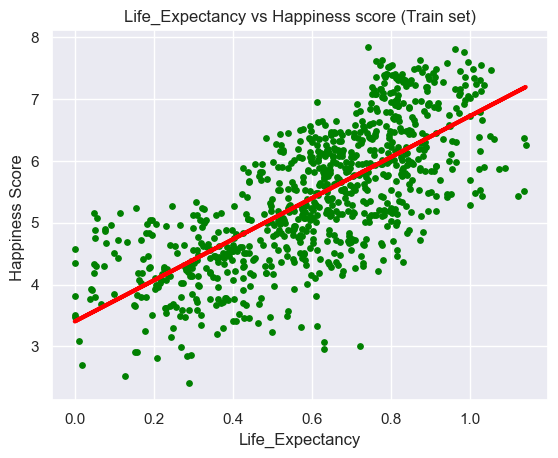

In [47]:
# Visualizing the training set results.
plot_test = plt
plot_test.scatter(X_train, y_train, color='green', s = 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('Life_Expectancy vs Happiness score (Train set)')
plot_test.xlabel('Life_Expectancy')
plot_test.ylabel('Happiness Score ')
plot_test.show()

##### Compare the predicted y values with the actual y values in a data frame.

The models' outcome on the training set is similar to the test set's. There is a slight decrease in the R-squared and a iincrease in the mean squared error. However, the difference is small.

### 4. Final Conclusions

A linear relationship exists between GDP and life expectancy in relation to the happiness score. Both variables influence how happy a person is. However, a better fitting model could be made by including more independent variables (X) in the regression model (multiple linear regression).